# Assigment 4

# This is a mini-project assignment that includes only programming questions. You are asked to implement optimization algorithms for ML classification problems. 

## Marking of this assignment will be based on the correctness of your ML pipeline and efficiency of your code. 

## Upload your code on Learn dropbox and submit pdfs of the code and to Crowdmark.

## -----------------------------------------------------------------------------------------------------------

In [1]:
# !pip install numpy, scipy, sys

## Suggested way of loading data to python for the assigment. There are alternatives of course, you can use your preferred way if you want.

In [2]:
# Download the LIBSVM package from here: https://www.csie.ntu.edu.tw/~cjlin/libsvm/#download 
# If your download is successfull you should have the folder with name: libsvm-3.24.
# We will use this package to load datasets. 

# Enter the downloaded folder libsvm-3.24 through your terminal. 
# Run make command to compile the package.

# Load this auxiliary package.
import sys

# add here your path to the folder libsvm-3.24/python
path = "/Users/michaelhuang/Documents/school/2019fall/cs794/a45/libsvm-3.24/python/"
# Add the path to the Python paths so Python can find the module.
sys.path.append(path)

# Load the LIBSVM module.
from svmutil import *

# Add here your path to the folder libsvm-3.24
path = "/Users/michaelhuang/Documents/school/2019fall/cs794/a45/libsvm-3.24/"

# Test that it works. This will load the data "heart_scale" 
# and it will store the labels in "b" and the data matrix in "A".
b, A = svm_read_problem(path + 'heart_scale')

# Use "svm_read_problem" function to load data for your assignment.

# Note that matrix "A" stores the data in a sparse format. 
# In particular matrix "A" is a list of dictionaries. 
# The length of the list gives you the number of samples.
# Each entry in the list is a dictionary. The keys of the dictionary are the non-zero features.
# The values of the dictionary for each key is a list which gives you the feature value. 

## Load other useful modules

In [3]:
import matplotlib.pyplot as plt

# Numpy is useful for handling arrays and matrices.
import numpy as np
import time
from scipy.sparse import csr_matrix
from scipy import sparse
import sklearn.feature_extraction
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
import random

## Datasets that you will need for this assignment.

In [3]:
# There is an extended selection of classification and regression datasets 
# https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/

# Out of all these datasets you will need the following 3 datasets, which are datasets for classification problems.
# 
# a9a dataset: https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#a9a 
# This dataset is small, it is recommened to start your experiments with this dataset.
#
# news20.binary dataset: https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#news20.binary
#
# covtype.binary dataset: https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#covtype.binary
#
# Exploit the sparsity of the problem when you implement optimization methods.

## Training, Validation and Testing data

In [4]:
# All datasets above consist of training and testing data. 

# You should seperate the training data into training and validation data.
# Follow the instructions from the lectures about how you can use both training and validation data.
# You can use 10% of the training data as validation data and the remaining 90% to train the models.
# This is a suggested percentage, you can do otherwise if you wish.

# Do not use the testing data to influence training in any way. Do not use the testing data at all.
# Only your instructor and TA will use the testing data to measure generalization error. 
# If you do use the testing data to tune parameters or for training of the algorithms we will figure it out :-). 

## Optimization problems

### You need to solve the following optimization problems 

Hinge-loss
$$\mbox{minimize}_{x\in\mathbb{R}^d, \beta \in \mathbb{R}}  \frac{1}{n} \sum_{i=1}^n \max \{0,1-b_i(a_i^Tx + \beta)\},$$
where $a_i\in\mathbb{R}^d$ is the feature vector for sample $i$ and $b_i$ is the label of sample $i$. The sub-gradient of the hinge-loss is given in the lecture slides (note that there is a small difference due to the intercept $\beta$). A smooth approximation of the function $f(z):=\max\{0,1-z\}$ is given by
$$
\psi_\mu(z) = 
\begin{cases}
0 & z\ge 1\\
(1-z)^2 & \mu < z < 1 \\
(1-\mu)^2 + 2(1-\mu)(\mu-z) & z \le \mu.
\end{cases}
$$
You can use the smooth approximation $\psi_\mu(z)$ for methods that work only for smooth functions. For sub-gradient methods you should use the sub-gradient.

L2-regularized logistic regression
$$\mbox{minimize}_{x\in\mathbb{R}^d,\beta\in\mathbb{R}}  \lambda \|x\|_2^2 + \frac{1}{n} \sum_{i=1}^n \log (1+ \exp(-b_i(a_i^Tx + \beta))).$$
This is a smooth objective function, therefore, you should use gradient methods to solve it. You do not need sub-gradient methods for this problem.

Note that for hinge-loss the labels should be -1 or 1. For logistic regression the labels should be 0 or 1. Check the labels that you loaded to make sure that they have the correct values for the correct problem. If not, then convert them appropriately.

## Optimization algorithms

In [4]:
# For this assignment you will need the following methods

# 1) Stochastic sub-gradient
# 2) Stochastic gradient
# 3) Mini-batch (sub-)gradient (you will have to decide what batching strategy to use, see lecture slides)
# 4) Stochastic average sub-gradient (SAG)
# 5) Stochastic average gradient (SAG)
# 6) Gradient descent with Armijo line-search
# 7) Acceleratd gradient with Armijo line-search (the same method as Q5 in Assignemnt 3)

# Information is provided in the lecture slides about parameter tuning and termination.
# However, the final decision of any parameter tuning and termination criteria is up to the students to make. 

In [6]:
path = "/Users/michaelhuang/Documents/school/2019fall/cs794/a45/a9a"
train_label, train_data = svm_read_problem(path)
path = "/Users/michaelhuang/Documents/school/2019fall/cs794/a45/a9a.t"
test_label, test_data = svm_read_problem(path)
v = sklearn.feature_extraction.DictVectorizer(sparse=True, dtype=float)
train_data = v.fit_transform(train_data)
train_label = np.array([train_label]).T
numberOfFeature = train_data.shape[1]
# add a column of 1
n = train_data.shape[0]
ones = np.ones((n,1))
train_data = hstack([ones, train_data]).tocsr()

trainA, validationA, trainLabel, validationLabel = train_test_split(train_data, train_label, test_size=0.1)

# spilt training set and validation set

def genWeight():
    weights = np.ones(124)
    weights = np.reshape(weights,(len(weights),1))
    return weights

In [11]:
from numpy.linalg import norm
def fx(x,b,a,lambda_,n):
    result = lambda_ * (norm(x,2)**2)
    term2 = (1/n)*np.sum(np.log(1+np.exp(-b*a.dot(x))))
    result += term2
    return result

def gradient_x (x,b,a,lambda_,n):
    term1 = 2*lambda_*x
    term2 = 0
    term2 = ((1/n)*np.sum(a.multiply(-b/(1+np.exp(b*a.dot(x)))),axis = 0)).T
    result = np.array(term1)+np.array(term2)
    print(result.shape)
    return result

def line_search_armijo_x(x,b,a,lambda_,n,gamma):
    alpha = 1
    fxk = fx(x,b,a,lambda_,n)
    grad = gradient_x(x,b,a,lambda_,n)
    x_new = x - alpha * grad
    f_new = fx(x_new,b,a,lambda_,n)
    delta = gamma * (norm(grad,2)**2)
    norm_grad = alpha * delta
    while f_new > fxk - norm_grad:
        alpha = alpha/2
        x_new = np.array(x - alpha * grad)
        f_new = fx(x_new,b,a,lambda_,n)
        norm_grad = alpha * delta
    return alpha


def gradient_descent_armijo(x0,b,a,lambda_,gamma,max_iterations,epsilon):
    x = x0
    n = b.shape[0]
    grad_x = gradient_x(x,b,a,lambda_,n)
    iteration = 0
    st = time.time()
    fx_array = [fx(x,b,a,lambda_,n)]
    running_time =[0]
    while norm(grad_x,2) > epsilon and iteration < max_iterations:
        alpha_x = line_search_armijo_x(x,b,a,lambda_,n,gamma)
        x = x - alpha_x * grad_x
        grad_x = gradient_x(x,b,a,lambda_,n)
        
        fx_array.append(fx(x,b,a,lambda_,n))
        running_time.append(time.time()-st)
        iteration += 1
    print(iteration)
    return x,fx_array,running_time



In [12]:

def validation(weights,validationLabel,validationA_matrix):
    prediction = 1/(np.exp(-validationA_matrix*weights)+1)
    prediction = np.where(prediction > 0.5, 1,-1)
    error = np.sum(abs(prediction - validationLabel))
    error = error/len(prediction)
    error = error/2
    return prediction,error
np.set_printoptions(threshold=np.inf)

In [13]:

def predict_logistic(test_data,weights,test_label,numberOfFeature):
    test_label = np.array(test_label)
    test_label = np.asarray(test_label)
    test_label = np.reshape(test_label,(len(test_label),1))
    test_mat = np.zeros((len(test_data),numberOfFeature+1))
#     print(d)
    for i in range(len(test_data)):
        test_mat[i][0] = 1
        for key in test_data[i]:
            test_mat[i][key] =1
    test_mat = sparse.csr_matrix(test_mat)
    p,error = validation(weights,test_label,test_mat)
    print("error "+ str(error))
    return 

In [14]:
lambda_=0.01
max_iterations = 1000
gamma = 0.5
epsilon = 1.0e-2

In [15]:
# logistic regression with gradient descent
weights = genWeight()
weights_method6,fx_array_method6,running_time_method6 = gradient_descent_armijo(weights,trainLabel,trainA,lambda_,gamma,max_iterations,epsilon)
p,error = validation(weights_method6,validationLabel,validationA)
print("error "+ str(error))
# predict
predict_logistic(test_data,weights_method6,test_label,numberOfFeature)


(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(124, 1)
(

KeyboardInterrupt: 

## Question 2

In [11]:
# method 7 for logistic 
def acc_gradient_armijo(x0,b,a,lambda_,gamma,max_iterations,epsilon):
    n = b.shape[0]
    x = x0
    y = x0
    t = 1
    t_prev = t
    x_prev = x
    grad_x = gradient_x (x,b,a,lambda_,n)
    iteration = 1
    fx_list = []
    fx_list.append(fx(x,b,a,lambda_,n))
    st = time.time()
    running_time =[]
    running_time.append(0)
    while norm(grad_x,2) > epsilon and iteration < max_iterations:
        alpha = line_search_armijo_x(y, b, a, lambda_, n, gamma)
        x = y - alpha * gradient_x (y,b,a,lambda_,n)
        t = (1 + (1+4*(t**2))**(0.5))/2
        y = x + ((t_prev-1)/t)*(x - x_prev)
        grad_x = gradient_x (x,b,a,lambda_,n)
        t_prev = t
        x_prev = x
        iteration +=1
        fx_list.append(fx(x,b,a,lambda_,n))
        running_time.append(time.time()-st)
#         print(iteration)
    return x,fx_list,running_time

In [14]:
# logistic regression with Acceleratd gradient with Armijo line-search
weights = genWeight()
weights_method7,fx_array_method7,running_time_method7 = acc_gradient_armijo(weights,trainLabel,trainA,lambda_,gamma,max_iterations,epsilon)
p,error = validation(weights_method7,validationLabel,validationA)
print("error "+ str(error))


error 0.1522873810254836


In [12]:

# method 2 stochastic gradient for logistic regression
def stochastic_gradient_descent(x0,b,a,lambda_,max_iterations,epsilon):
    n = b.shape[0]
    x = x0
    i = random.randint(0,a.shape[0]-1)
    grad_x = gradient_x(x,b[i],a[i],lambda_,1)
    iteration = 1
    st = time.time()
    fx_array = [fx(x,b,a,lambda_,n)]
    running_time =[0]
    x_sum = x
    while iteration < max_iterations:
        alpha =1/iteration
        x = x - alpha * grad_x
        i = random.randint(0,a.shape[0]-1)
        grad_x = gradient_x(x,b[i],a[i],lambda_,1)
        fx_array.append(fx(x,b,a,lambda_,n))
        running_time.append(time.time()-st)
        x_sum+=x
        iteration += 1
    print(iteration)
    x_avg = x_sum/iteration
    
    return x_avg,fx_array,running_time

In [16]:
# logistic regression with stochastic
weights = genWeight()
weights_method2,fx_array_method2,running_time_method2 = stochastic_gradient_descent(weights,trainLabel,trainA,lambda_,max_iterations,epsilon)
p,error = validation(weights_method2,validationLabel,validationA)
print(error)

1000
0.2698802579060485


In [13]:
# 3) Mini-batch (sub-)gradient (you will have to decide what batching strategy to use, see lecture slides)
def stochastic_gradient_descent_miniBatch(x0,b,a,lambda_,max_iterations,epsilon):
    n = b.shape[0]
    x = x0
    batch_size = 8
    iteration = 1
    st = time.time()
    fx_array = [fx(x,b,a,lambda_,n)]
    running_time =[0]
    x_sum = x
    while True:
        grad_x = 0
        indcis = np.round(np.random.rand(batch_size)* (a.shape[0] - 1)).astype(int)
        grad_x = gradient_x(x,b[indcis],a[indcis],lambda_,batch_size)
        alpha = 1/iteration
        x = x - alpha * grad_x
        fx_array.append(fx(x,b,a,lambda_,n))
        running_time.append(time.time()-st)
        x_sum+=x
        iteration += 1
        if iteration > max_iterations: break
    print(iteration)
    x_avg = x_sum/iteration
    
    return x_avg,fx_array,running_time

In [18]:
# logistic regression with stochastic mini batch
weights = genWeight()
weights_method3,fx_array_method3,running_time_method3 = stochastic_gradient_descent_miniBatch(weights,trainLabel,trainA,lambda_,max_iterations,epsilon)
p,error = validation(weights_method3,validationLabel,validationA)
print("error "+ str(error))
    

1001
error 0.25299355234878723


In [14]:
# 5) Stochastic average gradient (SAG)
def stochastic_gradient_descent_avg(x0,b,a,lambda_,max_iterations,epsilon):
    n = b.shape[0]
    x = x0
    iteration = 1
    
    st = time.time()
    fx_array = [fx(x,b,a,lambda_,n)]
    running_time =[0]
    x_sum = x
    x_previous = x
    grad_sum = 0
    
    grad_sum = gradient_x(x,b,a,lambda_,n)
    
    while True:
        i = random.randint(0,a.shape[0]-1)
        grad_new = gradient_x(x,b[i],a[i],lambda_,1)
        grad_old = gradient_x(x_previous,b[i],a[i],lambda_,1)
        constant = 2.3
        step = 1/constant
        alpha = step/iteration
        grad_sum = (1/n)*(grad_new - grad_old) + grad_sum
        x_previous = x
        x = x - alpha *(grad_sum)
        fx_array.append(fx(x,b,a,lambda_,n))
        running_time.append(time.time()-st)
        x_sum+=x
        iteration += 1
        if iteration > max_iterations: break
    print(iteration)
    x_avg = x_sum/iteration
    
    return x_avg,fx_array,running_time

In [20]:
# logistic regression with Stochastic average gradient
weights = genWeight()

weights_method5,fx_array_method5,running_time_method5 = stochastic_gradient_descent_avg(weights,trainLabel,trainA,lambda_,max_iterations,epsilon)
p,error = validation(weights_method5,validationLabel,validationA)
print("error "+ str(error))
    

1001
error 0.2806263432606693


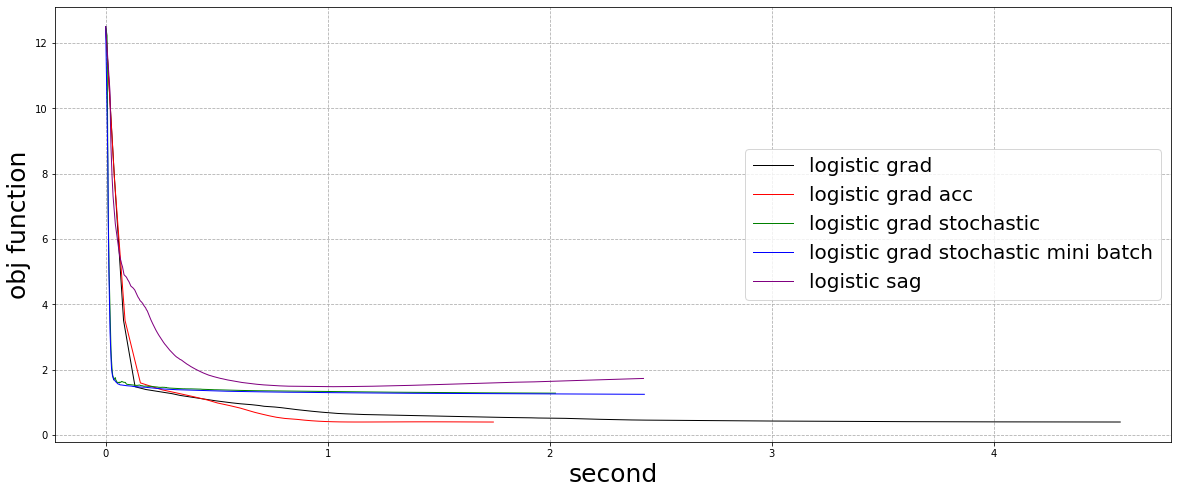

In [21]:
# print(fx_array_method2)
fig = plt.figure(figsize=(20, 8))
plt.plot(running_time_method6,fx_array_method6, label=("logistic grad"), linewidth=1.0, color ="black")
plt.plot(running_time_method7,fx_array_method7, label=("logistic grad acc"), linewidth=1.0, color ="red")
plt.plot(running_time_method2,fx_array_method2, label=("logistic grad stochastic"), linewidth=1.0, color ="green")
plt.plot(running_time_method3,fx_array_method3, label=("logistic grad stochastic mini batch"), linewidth=1.0, color ="blue")
plt.plot(running_time_method5,fx_array_method5, label=("logistic sag"), linewidth=1.0, color ="purple")

plt.legend(prop={'size': 20},loc="right")
plt.xlabel("second", fontsize=25)
plt.ylabel("obj function", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()


## Validation error: measure the validation error by calculating
$$
\frac{1}{t}\sum_{i\in\mbox{validation data}} \left| \ b_i^{\mbox{your model}} - b_i^{\mbox{true}} \ \right|
$$
where $t$ is the number of samples in your validation set. $b_i^{\mbox{true}}$ is the true label of the $i$-th sample. $b_i^{\mbox{your model}}$ is the label of the $i$-th sample of your model.

For hinge loss calculate $$b_i^{\mbox{your model}}:= \mbox{sign}(a_i^Tx + \beta).$$

For logistic regression calculate the predicted label by
$$
b_i^{\mbox{your model}}=
\begin{cases}
1 & \mbox{if } \frac{1}{1+e^{-(a_i^Tx + \beta)}} > 0.5\\
-1 & \mbox{otherwise}
\end{cases}
$$

## Question 1: Use the ML pipeline that is mentioned in slide 60 of Lecture 11 to train your model for the logistic regression problem (the hinge-loss problem does not have any hyper-parameters). Pick any algorithm that you want from the above suggested list to train the models. Report your ML pipeline. Print your Generalization Error. We will not measure running time for this pipeline. Running time will be measure only in Q2. Marks: 30.

## Question 2: Plot the objective function (y-axis) vs running time in sec (x-axis). Have one plot for each optimization problem. In each plot show the performance of all relevant algorithms. For each plot use the parameter setting that gives you the best validation error in Q1 (this refers to the logistic regression probelm). Do not show plots for all parameter settings that you tried in Q1, only for the one that gives you the smallest validation error. Do not include computation of any plot data in the computation of the running time of the algorithm, unless the plot data are computed by the algorithm anyway. Make sure that the plots are clean and use appropriate legends. Note that we should be able to re-run the code and obtain the plots. Marks: 70.

### For this question, we will measure the running time of your stochastic sub-gradient method for the sparse dataset news20.binary for the hinge-loss problem. We will not measure the running time of any other combination of algorithm, dataset, problem. You need to implement the stochastic sub-gradient method and encapsulate it in a python class.

To make sure your object can be used by our script, your class should have two methods:

1. <strong>fit(self, train_data, train_label)</strong>. It will use stochastic sub-gradient method to minimize the hinge loss and store the optimized coefficients (i.e. $x, \beta$) in the instance. The "train_data" and "train_label" are similar to the output of "svm_read_problem". 
    * "train_data" is a list of $n$ python dictionaries (int -> float), which presents a sparse matrix. The keys (int) and values (float) in the dictionary at train_data[i] are the indices (int) and values (float) of non-zero entries of row $i$. 
    * "train_label" is a list of $n$ integers, it only has <strong>-1s and 1s</strong>. $n$ is the number of samples.  This function returns nothing.


2. <strong>predict(self, test_data)</strong>. It will predict the label of the input "test_data" by using the coefficients stored in the instance. The "test_data" has the same data structure as the "train_data" of the "fit" function. This function returns a list of <strong>-1s and 1s</strong> (i.e. the prediction of your labels).

You can also define other methods to help your programming, we will only call the two methods decribed above.

To let us import your class, you need to follow these rules:

1. You should name your python file by <strong>a4_[your student ID].py</strong>. For example, if your student id is 12345, then your file name is <strong>a4_12345.py</strong>
1. Your object name should be <strong>MyMethod</strong> (it's case sensitive).

Any violation of the above requirements will get error in our script and you will get at most 50% of the total score. Your solution will be mainly measured by the runing time of the <strong>fit</strong> function and the accuracy of the <strong>predict</strong> function. For example your method will be called and measured in following pattern:

    obj = MyMethod()
    st = time.time()
    obj.fit(train_data, train_label) # .fit() optimizes the objective and stores coefficients in obj.
    running_time = time.time() - st
    predict_label = obj.predict(test_data)
    accuracy = get_accuracy(predict_label, test_label) # this is a function we use to measure accuracy.
Then your accuracy will be measured by <strong>predict_labels</strong>, you don't have to implement "get_accuracy". When you finish your implementation, upload the .py file to Learn dropbox.

## hing-loss

In [15]:
def fx_hing_loss(x,b,a):
    term = 1-b*a.dot(x)
    term = np.where(term>0, term , 0)
    result = (1/b.shape[0])*np.sum(term)
    return result

def sub_gradient_hing_loss (x,bi,ai):
    term = bi*ai.dot(x)
    if 1-term>0:
        result = -bi*ai
        result = np.reshape(result,(len(result),1))
    else:
        result = np.zeros((x.shape[0],1))
    return result


In [16]:
def stochastic_sub_gradient_hingLoss(x,b,a,max_iterations,epsilon):
    n = b.shape[0]
    i = random.randint(0,a.shape[0]-1)
    grad_x = sub_gradient_hing_loss(x,b[i],a[i])
    iteration = 1
    st = time.time()
    fx_array = [fx_hing_loss(x,b,a)]
    running_time =[0]
    x_sum = x
    while iteration < max_iterations:
        alpha = 1/iteration
        x = x - alpha * grad_x
        i = random.randint(0,a.shape[0]-1)
        grad_x = sub_gradient_hing_loss(x,b[i],a[i])
        fx_array.append(fx_hing_loss(x,b,a))
        running_time.append(time.time()-st)
        x_sum+=x
        iteration += 1
    x_avg = x_sum/iteration
    
    return x_avg,fx_array,running_time

def validation_hing(weights,validationLabel,validationA_matrix):
    prediction = validationA_matrix.dot(weights)
    prediction = np.where(prediction >0 , 1, -1)
    error = np.sum(abs(prediction - validationLabel))
    error = error/len(prediction)
    error = error/2
    return prediction,error

In [24]:
weights = genWeight()
weights_method1,fx_array_method1,running_time_method1 = stochastic_sub_gradient_hingLoss(weights,trainLabel,trainA,max_iterations,epsilon)
p,error = validation_hing(weights_method1,validationLabel,validationA)
print("error "+ str(error))

error 0.2582130795210316


In [17]:
# 3) Mini-batch (sub-)gradient
def sub_sto_grad_miniBatch(x0,b,a,max_iterations,epsilon):
    n = b.shape[0]
    x = x0
    batch_size = 18
    iteration = 1
    st = time.time()
    fx_array = [fx_hing_loss(x,b,a)]
    running_time =[0]
    x_sum = x
    while True:
        grad_x = 0
#         indcis = np.round(np.random.rand(batch_size)* (a.shape[0] - 1)).astype(int)
        for k in range(batch_size):
            index = random.randint(0,a.shape[0]-1)
            grad_x += sub_gradient_hing_loss(x,b[index],a[index])
        grad_x = (1/batch_size)*grad_x
        alpha = 1/iteration
        x = x - alpha * grad_x
        fx_array.append(fx_hing_loss(x,b,a))
        running_time.append(time.time()-st)
        x_sum+=x
        iteration += 1
        if iteration > max_iterations: break
    print(iteration)
    x_avg = x_sum/iteration
    
    return x_avg,fx_array,running_time

In [26]:
weights = genWeight()
weights_sub_mini,fx_array_sub_mini,running_sub_mini = sub_sto_grad_miniBatch(weights,trainLabel,trainA,max_iterations,epsilon)
p,error = validation_hing(weights_sub_mini,validationLabel,validationA)
print("error "+ str(error))

1001
error 0.23641387780165796


In [18]:
def sub_sto_grad_avg(x0,b,a,max_iterations,epsilon):
    x = x0
    sumx = x
    fx = fx_hing_loss(x,b,a)
    fx_array = [fx]
    i = 0
    grad_sum = sub_gradient_hing_loss(x,b[0],a[0])
    for j in range(1,a.shape[0]):
        grad_sum += sub_gradient_hing_loss(x,b[j],a[j])
    start_time = time.time()
    time_array = [0]
    grad_sum = grad_sum / a.shape[0]
#     grad_sum = np.reshape(grad_sum,(grad_sum.shape[1],1))
    prev_x = x
    while True:
        if i >= max_iterations: break
        alpha = 0.4/(i+1)
        # randomly pick one row of A
        index = random.randint(0,a.shape[0]-1)
        prev_grad = sub_gradient_hing_loss(prev_x,b[index],a[index])
        pgrad_updated = sub_gradient_hing_loss(x,b[index],a[index])
        grad_sum = grad_sum - (prev_grad - pgrad_updated)/len(b)
        # updating part_grad_array
        prev_x = x
        x = x - alpha * grad_sum
        sumx = np.array(x).reshape((len(x),1)) + sumx
        fx = fx_hing_loss(x,b,a)
        fx_array.append(fx)
        i = i + 1
        time_array.append(time.time() - start_time)
    result = sumx/len(fx_array)
    print(i)
    return result, fx_array, time_array


In [28]:
weights = genWeight()
weights_sub_avg,fx_array_avg,running_avg = sub_sto_grad_avg(weights,trainLabel,trainA,max_iterations,epsilon)
p,error = validation_hing(weights_sub_avg,validationLabel,validationA)
print("error "+ str(error))

1000
error 0.5326988025790604


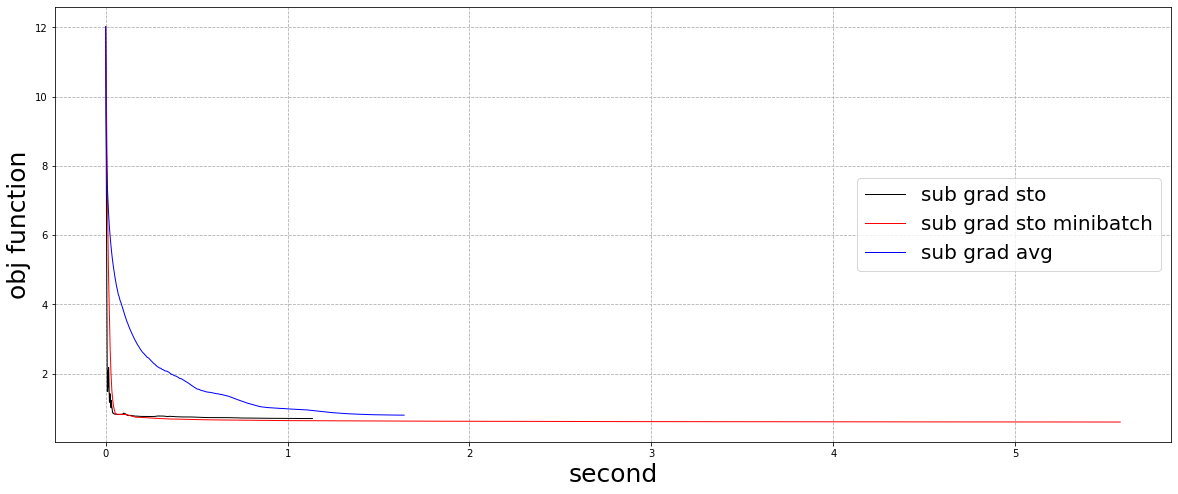

In [29]:
fig = plt.figure(figsize=(20, 8))
plt.plot(running_time_method1,fx_array_method1, label=("sub grad sto"), linewidth=1.0, color ="black")
plt.plot(running_sub_mini,fx_array_sub_mini, label=("sub grad sto minibatch"), linewidth=1.0, color ="red")
plt.plot(running_avg,fx_array_avg, label=("sub grad avg"), linewidth=1.0, color ="blue")
plt.legend(prop={'size': 20},loc="right")
plt.xlabel("second", fontsize=25)
plt.ylabel("obj function", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()

In [19]:
# appromximation
def fx_hing_loss_smooth(x,b,a,mu):
    z = b*a.dot(x)
    result = np.where(z<=mu, (1-mu)**2+2*(1-mu)*(mu-z),(1-z)**2)
    result = np.where(z >=1, 0, result)
    result = (1/b.shape[0])*np.sum(result)
    return result

def grad_hing_loss_smooth(x,b,a,mu):
    z = b*a.dot(x)
    grad_z = a.multiply(b)
    g1 = -2*grad_z + 2*mu*grad_z
    g2 = 2*grad_z.multiply(1-z)
    zeros = np.zeros((a.shape[0],a.shape[1]))
    z_re = np.repeat(z, a.shape[1], axis=1)
    result = np.where(z_re<=mu, g1.todense(), g2.todense())
    result = np.where(z_re>=1, zeros, result)
    result = 1/b.shape[0] * np.sum(result,axis =0).T
    result = np.reshape(result,(len(result),1))
    return result

In [20]:
mu = 0.1



In [21]:
# 6) Gradient descent with Armijo line-search hinge loss
def line_search_armijo_hing(x,b,a,gamma,mu):
    alpha = 1
    fxk = fx_hing_loss_smooth(x,b,a,mu)
    grad = grad_hing_loss_smooth(x,b,a,mu)
    x_new = x - alpha * grad
    f_new = fx_hing_loss_smooth(x_new,b,a,mu)
    delta = gamma * (norm(grad,2)**2)
    norm_grad = alpha * delta
    while f_new > fxk - norm_grad:
        alpha = alpha/2
        x_new = np.array(x - alpha * grad)
        f_new = fx_hing_loss_smooth(x_new,b,a,mu)
        norm_grad = alpha * delta
    return alpha

def gradient_descent_armijo_hing(x0,b,a,gamma,max_iterations,epsilon,mu):
    x = x0
    n = b.shape[0]
    grad_x = grad_hing_loss_smooth(x,b,a,mu)
    iteration = 0
    st = time.time()
    fx_array = [fx_hing_loss_smooth(x,b,a,mu)]
    running_time =[0]
    while norm(grad_x,2) > epsilon and iteration < max_iterations:
        alpha_x = line_search_armijo_hing(x,b,a,gamma,mu)
        fx = fx_hing_loss_smooth(x,b,a,mu)
        x = x - alpha_x * grad_x
        grad_x = grad_hing_loss_smooth(x,b,a,mu)
        fx_new = fx_hing_loss_smooth(x,b,a,mu)
        fx_array.append(fx_new)
        running_time.append(time.time()-st)
        iteration += 1
        if abs(fx_new - fx) <0.001:break
    print(iteration)
    return x,fx_array,running_time



In [33]:
mu = 0.1

In [34]:
weights = genWeight()
weights_method6_hing,fx_array_method6_hing,running_time_method6_hing = gradient_descent_armijo_hing(weights,trainLabel,trainA,gamma,50,epsilon,mu)
p,error = validation_hing(weights_method6_hing,validationLabel,validationA)
print("error "+ str(error))

5
error 0.26220448265274793


In [22]:
def acc_gradient_armijo_hing(x0,b,a,gamma,max_iterations,epsilon,mu):
    n = b.shape[0]
    x = x0
    y = x0
    t = 1
    t_prev = t
    x_prev = x
    grad_x = grad_hing_loss_smooth(x,b,a,mu)
    iteration = 1
    fx_list = [fx_hing_loss_smooth(x,b,a,mu)]
    st = time.time()
    running_time =[0]
    while norm(grad_x,2) > epsilon and iteration < max_iterations:
        alpha = line_search_armijo_hing(y,b,a,gamma,mu)
        fx = fx_hing_loss_smooth(y,b,a,mu)
        x = y - alpha * grad_hing_loss_smooth(y,b,a,mu)
        t = (1 + (1+4*(t**2))**(0.5))/2
        y = x + ((t_prev-1)/t)*(x - x_prev)
        grad_x = grad_hing_loss_smooth(x,b,a,mu)
        t_prev = t
        x_prev = x
        iteration +=1
        fx_new = fx_hing_loss_smooth(x,b,a,mu)
        fx_list.append(fx_new)
        running_time.append(time.time()-st)
        if abs(fx_new - fx) <0.001:break
    print(iteration)
    return x,fx_list,running_time

In [36]:
weights = genWeight()
weights_method7_hing,fx_array_method7_hing,running_time_method7_hing = acc_gradient_armijo_hing(weights,trainLabel,trainA,gamma,50,epsilon,mu)
p,error = validation_hing(weights_method7_hing,validationLabel,validationA)
print("error "+ str(error))

9
error 0.2692661958857845


In [23]:
# method 2 stochastic gradient for smooth hing
def stochastic_gradient_descent_hing(x0,b,a,max_iterations,epsilon,mu):
    n = b.shape[0]
    x = x0
    i = random.randint(0,a.shape[0]-1)
    grad_x = grad_hing_loss_smooth(x,b[i],a[i],mu)
    iteration = 1
    st = time.time()
    fx_array = [fx_hing_loss_smooth(x,b,a,mu)]
    running_time =[0]
    x_sum = x
    while iteration < max_iterations:
        alpha = 1/iteration
        x = x - alpha * grad_x
        i = random.randint(0,a.shape[0]-1)
        grad_x = grad_hing_loss_smooth(x,b[i],a[i],mu)
        fx_array.append(fx_hing_loss_smooth(x,b,a,mu))
        running_time.append(time.time()-st)
        x_sum+=x
        iteration += 1
    print(iteration)
    x_avg = x_sum/iteration
    
    return x_avg,fx_array,running_time

In [38]:
weights = genWeight()
weights_method2_hing,fx_array_method2_hing,running_time_method2_hing = stochastic_gradient_descent_hing(weights,trainLabel,trainA,max_iterations,epsilon,mu)
p,error = validation_hing(weights_method2_hing,validationLabel,validationA)
print("error "+ str(error))

1000
error 0.263432606693276


In [24]:
# 3) Mini-batch (sub-)gradient (you will have to decide what batching strategy to use, see lecture slides)
def stochastic_gradient_descent_miniBatch_hing(x0,b,a,max_iterations,epsilon,mu):
    n = b.shape[0]
    x = x0
    batch_size = 8
    iteration = 1
    st = time.time()
    fx_array = [fx_hing_loss_smooth(x,b,a,mu)]
    running_time =[0]
    x_sum = x
    while True:
        grad_x = 0
        indcis = np.round(np.random.rand(batch_size)* (a.shape[0] - 1)).astype(int)
        grad_x = grad_hing_loss_smooth(x,b[indcis],a[indcis],mu)
        alpha = 1/iteration
        x = x - alpha * grad_x
        fx_array.append(fx_hing_loss_smooth(x,b,a,mu))
        running_time.append(time.time()-st)
        x_sum+=x
        iteration += 1
        if iteration > max_iterations: break
    print(iteration)
    x_avg = x_sum/iteration
    
    return x_avg,fx_array,running_time

In [40]:
weights = genWeight()
weights_method3_hing,fx_array_method3_hing,running_time_method3_hing = stochastic_gradient_descent_miniBatch_hing(weights,trainLabel,trainA,max_iterations,epsilon,mu)
p,error = validation_hing(weights_method3_hing,validationLabel,validationA)
print("error "+ str(error))

1001
error 0.2747927540681609


In [25]:
# 5) Stochastic average gradient (SAG)
def stochastic_gradient_descent_avg_hing(x0,b,a,max_iterations,epsilon,mu):
    n = b.shape[0]
    x = x0
    iteration = 1
    
    st = time.time()
    fx_array = [fx_hing_loss_smooth(x,b,a,mu)]
    running_time =[0]
    x_sum = x
    x_previous = x
    grad_sum = 0
    
    grad_sum = grad_hing_loss_smooth(x,b,a,mu)
    
    while True:
        i = random.randint(0,a.shape[0]-1)
        grad_new = grad_hing_loss_smooth(x,b[i],a[i],mu)
        grad_old = grad_hing_loss_smooth(x_previous,b[i],a[i],mu)
        constant = 4
        step = 1/constant
        alpha = step/iteration
        grad_sum = (1/n)*(grad_new - grad_old) + grad_sum
        x_previous = x
        x = x - alpha *(grad_sum)
        fx_array.append(fx_hing_loss_smooth(x,b,a,mu))
        running_time.append(time.time()-st)
        x_sum+=x
        iteration += 1
        if iteration > max_iterations: break
    print(iteration)
    x_avg = x_sum/iteration
    
    return x_avg,fx_array,running_time

In [42]:
weights = genWeight()
weights_method5_hing,fx_array_method5_hing,running_time_method5_hing = stochastic_gradient_descent_avg_hing(weights,trainLabel,trainA,max_iterations,epsilon,mu)
p,error = validation_hing(weights_method5_hing,validationLabel,validationA)
print("error "+ str(error))

1001
error 0.30181148295977894


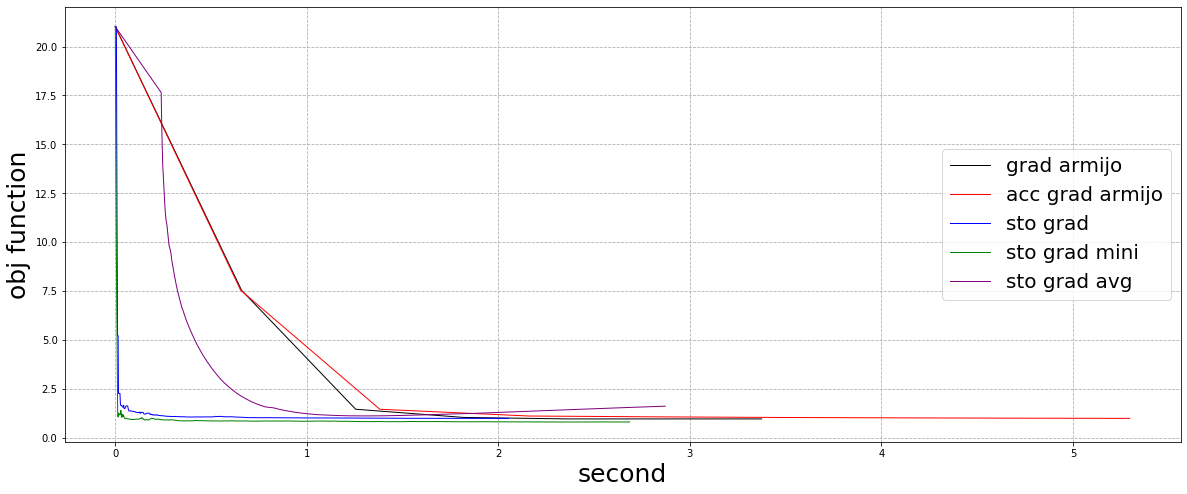

In [43]:
fig = plt.figure(figsize=(20, 8))
plt.plot(running_time_method6_hing,fx_array_method6_hing, label=("grad armijo"), linewidth=1.0, color ="black")
plt.plot(running_time_method7_hing,fx_array_method7_hing, label=("acc grad armijo"), linewidth=1.0, color ="red")
plt.plot(running_time_method2_hing,fx_array_method2_hing, label=("sto grad"), linewidth=1.0, color ="blue")
plt.plot(running_time_method3_hing,fx_array_method3_hing, label=("sto grad mini"), linewidth=1.0, color ="green")
plt.plot(running_time_method5_hing,fx_array_method5_hing, label=("sto grad avg"), linewidth=1.0, color ="purple")

plt.legend(prop={'size': 20},loc="right")
plt.xlabel("second", fontsize=25)
plt.ylabel("obj function", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()

In [44]:
path = "/Users/michaelhuang/Documents/school/2019fall/cs794/a4/news20.binary"
train_label_news, train_data_news = svm_read_problem(path)

v = sklearn.feature_extraction.DictVectorizer(sparse=True, dtype=float)
train_data_news = v.fit_transform(train_data_news)
train_label_news = np.array([train_label_news]).T

# add a column of 1
n = train_data_news.shape[0]
ones = np.ones((n,1))
train_data_news = hstack([ones, train_data_news]).tocsr()
numberOfFeature = train_data_news.shape[1]
trainA, validationA, trainLabel, validationLabel = train_test_split(train_data_news, train_label_news, test_size=0.1)

def genWeight_set2():
    weights = np.zeros(train_data_news.shape[1])
    weights = np.reshape(weights,(len(weights),1))
    return weights

In [45]:
weights = genWeight_set2()
weights_method6,fx_array_method6,running_time_method6 = gradient_descent_armijo(weights,trainLabel,trainA,lambda_,gamma,max_iterations,epsilon)
p,error = validation(weights_method6,validationLabel,validationA)
print("error "+ str(error))


33
error 0.2045


In [46]:
# logistic regression with Acceleratd gradient with Armijo line-search
weights = genWeight_set2()
weights_method7,fx_array_method7,running_time_method7 = acc_gradient_armijo(weights,trainLabel,trainA,lambda_,gamma,max_iterations,epsilon)
p,error = validation(weights_method7,validationLabel,validationA)
print("error "+ str(error))


error 0.2045


In [47]:
# logistic regression with stochastic
weights = genWeight_set2()
weights_method2,fx_array_method2,running_time_method2 = stochastic_gradient_descent(weights,trainLabel,trainA,lambda_,max_iterations,epsilon)
p,error = validation(weights_method2,validationLabel,validationA)
print(error)

1000
0.4895


In [48]:
# logistic regression with stochastic mini batch
weights = genWeight_set2()
weights_method3,fx_array_method3,running_time_method3 = stochastic_gradient_descent_miniBatch(weights,trainLabel,trainA,lambda_,max_iterations,epsilon)
p,error = validation(weights_method3,validationLabel,validationA)
print("error "+ str(error))

1001
error 0.4895


In [49]:
# logistic regression with Stochastic average gradient
weights = genWeight_set2()

weights_method5,fx_array_method5,running_time_method5 = stochastic_gradient_descent_avg(weights,trainLabel,trainA,lambda_,max_iterations,epsilon)
p,error = validation(weights_method5,validationLabel,validationA)
print("error "+ str(error))

1001
error 0.401


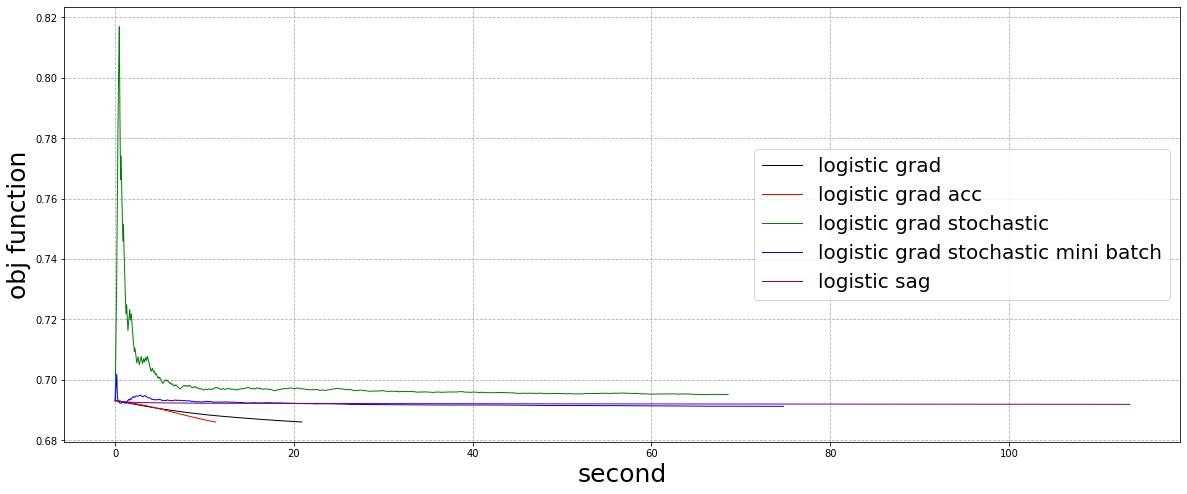

In [50]:
fig = plt.figure(figsize=(20, 8))
plt.plot(running_time_method6,fx_array_method6, label=("logistic grad"), linewidth=1.0, color ="black")
plt.plot(running_time_method7,fx_array_method7, label=("logistic grad acc"), linewidth=1.0, color ="red")
plt.plot(running_time_method2,fx_array_method2, label=("logistic grad stochastic"), linewidth=1.0, color ="green")
plt.plot(running_time_method3,fx_array_method3, label=("logistic grad stochastic mini batch"), linewidth=1.0, color ="blue")
plt.plot(running_time_method5,fx_array_method5, label=("logistic sag"), linewidth=1.0, color ="purple")

plt.legend(prop={'size': 20},loc="right")
plt.xlabel("second", fontsize=25)
plt.ylabel("obj function", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()

In [51]:
# hing loss
weights = genWeight_set2()
weights_method1,fx_array_method1,running_time_method1 = stochastic_sub_gradient_hingLoss(weights,trainLabel,trainA,max_iterations,epsilon)
p,error = validation_hing(weights_method1,validationLabel,validationA)
print("error "+ str(error))

error 0.5105


In [52]:
weights = genWeight_set2()
weights_sub_mini,fx_array_sub_mini,running_sub_mini = sub_sto_grad_miniBatch(weights,trainLabel,trainA,max_iterations,epsilon)
p,error = validation_hing(weights_sub_mini,validationLabel,validationA)
print("error "+ str(error))

1001
error 0.4895


In [53]:
weights = genWeight_set2()
weights_sub_avg,fx_array_avg,running_avg = sub_sto_grad_avg(weights,trainLabel,trainA,max_iterations,epsilon)
p,error = validation_hing(weights_sub_avg,validationLabel,validationA)
print("error "+ str(error))

1000
error 0.401


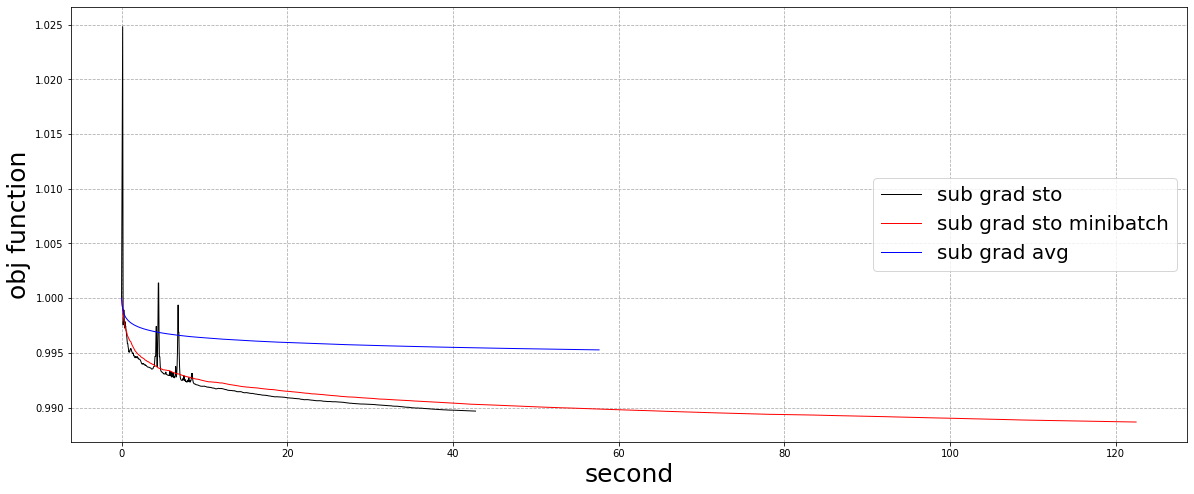

In [54]:
fig = plt.figure(figsize=(20, 8))
plt.plot(running_time_method1,fx_array_method1, label=("sub grad sto"), linewidth=1.0, color ="black")
plt.plot(running_sub_mini,fx_array_sub_mini, label=("sub grad sto minibatch"), linewidth=1.0, color ="red")
plt.plot(running_avg,fx_array_avg, label=("sub grad avg"), linewidth=1.0, color ="blue")
plt.legend(prop={'size': 20},loc="right")
plt.xlabel("second", fontsize=25)
plt.ylabel("obj function", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()

In [55]:
mu = 0.1

In [ ]:
weights = genWeight_set2()
weights_method6_hing,fx_array_method6_hing,running_time_method6_hing = gradient_descent_armijo_hing(weights,trainLabel,trainA,gamma,50,epsilon,mu)
p,error = validation_hing(weights_method6_hing,validationLabel,validationA)
print("error "+ str(error))

In [ ]:
weights = genWeight_set2()
weights_method7_hing,fx_array_method7_hing,running_time_method7_hing = acc_gradient_armijo_hing(weights,trainLabel,trainA,gamma,50,epsilon,mu)
p,error = validation_hing(weights_method7_hing,validationLabel,validationA)
print("error "+ str(error))

In [ ]:
weights = genWeight_set2()
weights_method2_hing,fx_array_method2_hing,running_time_method2_hing = stochastic_gradient_descent(weights,trainLabel,trainA,max_iterations,epsilon,mu)
p,error = validation_hing(weights_method2_hing,validationLabel,validationA)
print("error "+ str(error))

In [ ]:
weights = genWeight_set2()
weights_method3_hing,fx_array_method3_hing,running_time_method3_hing = stochastic_gradient_descent_miniBatch_hing(weights,trainLabel,trainA,max_iterations,epsilon,mu)
p,error = validation_hing(weights_method3_hing,validationLabel,validationA)
print("error "+ str(error))

In [ ]:
weights = genWeight_set2()
weights_method5_hing,fx_array_method5_hing,running_time_method5_hing = stochastic_gradient_descent_avg_hing(weights,trainLabel,trainA,max_iterations,epsilon,mu)
p,error = validation_hing(weights_method5_hing,validationLabel,validationA)
print("error "+ str(error))

In [ ]:
fig = plt.figure(figsize=(20, 8))
plt.plot(running_time_method6_hing,fx_array_method6_hing, label=("grad armijo"), linewidth=1.0, color ="black")
plt.plot(running_time_method7_hing,fx_array_method7_hing, label=("acc grad armijo"), linewidth=1.0, color ="red")
plt.plot(running_time_method2_hing,fx_array_method2_hing, label=("sto grad"), linewidth=1.0, color ="blue")
plt.plot(running_time_method3_hing,fx_array_method3_hing, label=("sto grad mini"), linewidth=1.0, color ="green")
plt.plot(running_time_method5_hing,fx_array_method5_hing, label=("sto grad avg"), linewidth=1.0, color ="purple")

plt.legend(prop={'size': 20},loc="right")
plt.xlabel("second", fontsize=25)
plt.ylabel("obj function", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()

In [26]:
path = "/Users/michaelhuang/Documents/school/2019fall/cs794/a4/covtype.libsvm.binary.scale"
train_label_news, train_data_news = svm_read_problem(path)

v = sklearn.feature_extraction.DictVectorizer(sparse=True, dtype=float)
train_data_news = v.fit_transform(train_data_news)
train_label_news = np.array([train_label_news]).T
train_label_news = np.where(train_label_news == 2,-1,1)
# add a column of 1
n = train_data_news.shape[0]
ones = np.ones((n,1))
train_data_news = hstack([ones, train_data_news]).tocsr()

trainA, validationA, trainLabel, validationLabel = train_test_split(train_data_news, train_label_news, test_size=0.1)

def genWeight_set3():
    weights = np.zeros(train_data_news.shape[1])
    weights = np.reshape(weights,(len(weights),1))
    return weights

In [27]:
weights = genWeight_set3()
weights_method6,fx_array_method6,running_time_method6 = gradient_descent_armijo(weights,trainLabel,trainA,lambda_,gamma,max_iterations,epsilon)
p,error = validation(weights_method6,validationLabel,validationA)
print("error "+ str(error))

49
error 0.3039654400881209


In [28]:
# logistic regression with Acceleratd gradient with Armijo line-search
weights = genWeight_set3()
weights_method7,fx_array_method7,running_time_method7 = acc_gradient_armijo(weights,trainLabel,trainA,lambda_,gamma,max_iterations,epsilon)
p,error = validation(weights_method7,validationLabel,validationA)
print("error "+ str(error))

error 0.30689132904202954


In [29]:
# logistic regression with stochastic
weights = genWeight_set3()
weights_method2,fx_array_method2,running_time_method2 = stochastic_gradient_descent(weights,trainLabel,trainA,lambda_,max_iterations,epsilon)
p,error = validation(weights_method2,validationLabel,validationA)
print(error)

1000
0.42063956490310145


In [30]:
# logistic regression with stochastic mini batch
weights = genWeight_set3()
weights_method3,fx_array_method3,running_time_method3 = stochastic_gradient_descent_miniBatch(weights,trainLabel,trainA,lambda_,max_iterations,epsilon)
p,error = validation(weights_method3,validationLabel,validationA)
print("error "+ str(error))

1001
error 0.37026264156139205


In [31]:
# logistic regression with Stochastic average gradient
weights = genWeight_set3()

weights_method5,fx_array_method5,running_time_method5 = stochastic_gradient_descent_avg(weights,trainLabel,trainA,lambda_,max_iterations,epsilon)
p,error = validation(weights_method5,validationLabel,validationA)
print("error "+ str(error))

1001
error 0.39862655330281227


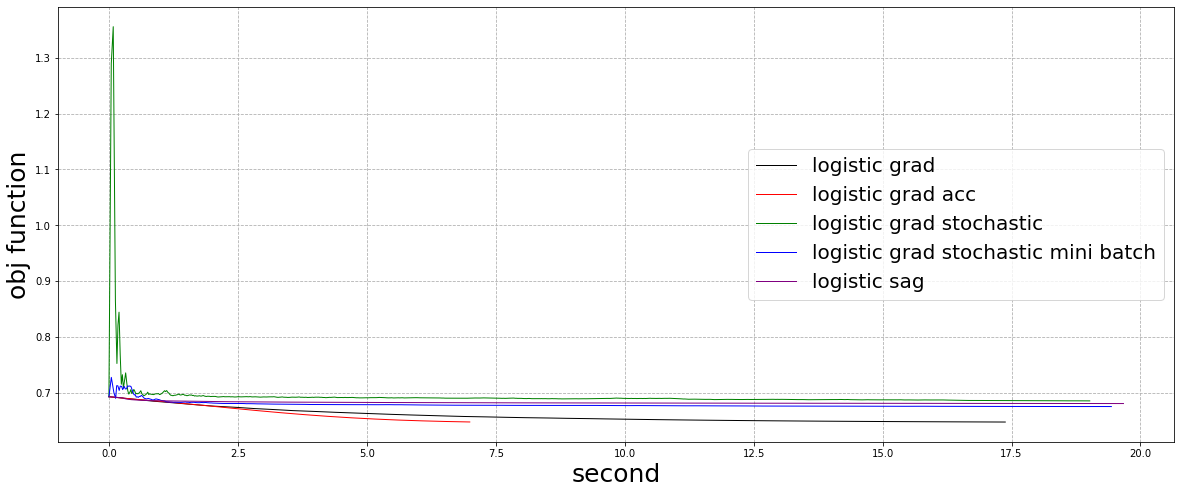

In [32]:
fig = plt.figure(figsize=(20, 8))
plt.plot(running_time_method6,fx_array_method6, label=("logistic grad"), linewidth=1.0, color ="black")
plt.plot(running_time_method7,fx_array_method7, label=("logistic grad acc"), linewidth=1.0, color ="red")
plt.plot(running_time_method2,fx_array_method2, label=("logistic grad stochastic"), linewidth=1.0, color ="green")
plt.plot(running_time_method3,fx_array_method3, label=("logistic grad stochastic mini batch"), linewidth=1.0, color ="blue")
plt.plot(running_time_method5,fx_array_method5, label=("logistic sag"), linewidth=1.0, color ="purple")

plt.legend(prop={'size': 20},loc="right")
plt.xlabel("second", fontsize=25)
plt.ylabel("obj function", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()

In [33]:
# hing loss
weights = genWeight_set3()
weights_method1,fx_array_method1,running_time_method1 = stochastic_sub_gradient_hingLoss(weights,trainLabel,trainA,max_iterations,epsilon)
p,error = validation_hing(weights_method1,validationLabel,validationA)
print("error "+ str(error))

error 0.4052184090048535


In [34]:
weights = genWeight_set3()
weights_sub_mini,fx_array_sub_mini,running_sub_mini = sub_sto_grad_miniBatch(weights,trainLabel,trainA,max_iterations,epsilon)
p,error = validation_hing(weights_sub_mini,validationLabel,validationA)
print("error "+ str(error))

1001
error 0.410571064679357


In [35]:
weights = genWeight_set3()
weights_sub_avg,fx_array_avg,running_avg = sub_sto_grad_avg(weights,trainLabel,trainA,max_iterations,epsilon)
p,error = validation_hing(weights_sub_avg,validationLabel,validationA)
print("error "+ str(error))

1000
error 0.39862655330281227


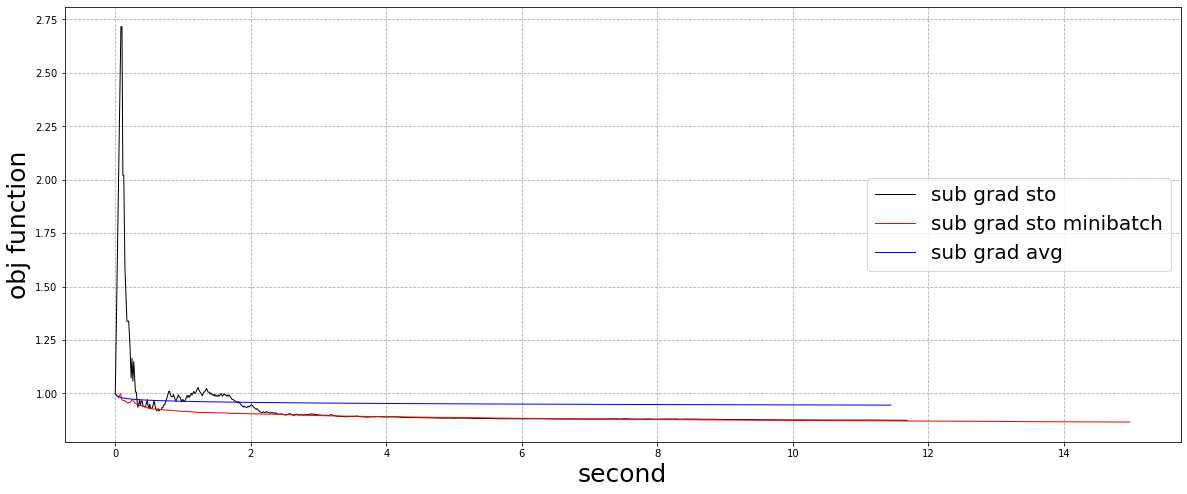

In [36]:
fig = plt.figure(figsize=(20, 8))
plt.plot(running_time_method1,fx_array_method1, label=("sub grad sto"), linewidth=1.0, color ="black")
plt.plot(running_sub_mini,fx_array_sub_mini, label=("sub grad sto minibatch"), linewidth=1.0, color ="red")
plt.plot(running_avg,fx_array_avg, label=("sub grad avg"), linewidth=1.0, color ="blue")
plt.legend(prop={'size': 20},loc="right")
plt.xlabel("second", fontsize=25)
plt.ylabel("obj function", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()

In [37]:
mu = 0.1
weights = genWeight_set3()
weights_method6_hing,fx_array_method6_hing,running_time_method6_hing = gradient_descent_armijo_hing(weights,trainLabel,trainA,gamma,50,epsilon,mu)
p,error = validation_hing(weights_method6_hing,validationLabel,validationA)
print("error "+ str(error))

2
error 0.39862655330281227


In [38]:
weights = genWeight_set3()
weights_method7_hing,fx_array_method7_hing,running_time_method7_hing = acc_gradient_armijo_hing(weights,trainLabel,trainA,gamma,50,epsilon,mu)
p,error = validation_hing(weights_method7_hing,validationLabel,validationA)
print("error "+ str(error))

3
error 0.39862655330281227


In [39]:
weights = genWeight_set3()
weights_method2_hing,fx_array_method2_hing,running_time_method2_hing = stochastic_gradient_descent(weights,trainLabel,trainA,max_iterations,epsilon,mu)
p,error = validation_hing(weights_method2_hing,validationLabel,validationA)
print("error "+ str(error))

1
error 0.5082957557399057


In [40]:
weights = genWeight_set3()
weights_method3_hing,fx_array_method3_hing,running_time_method3_hing = stochastic_gradient_descent_miniBatch_hing(weights,trainLabel,trainA,max_iterations,epsilon,mu)
p,error = validation_hing(weights_method3_hing,validationLabel,validationA)
print("error "+ str(error))

1001
error 0.3135348180785515


In [41]:
weights = genWeight_set3()
weights_method5_hing,fx_array_method5_hing,running_time_method5_hing = stochastic_gradient_descent_avg_hing(weights,trainLabel,trainA,max_iterations,epsilon,mu)
p,error = validation_hing(weights_method5_hing,validationLabel,validationA)
print("error "+ str(error))

1001
error 0.39857491996833155


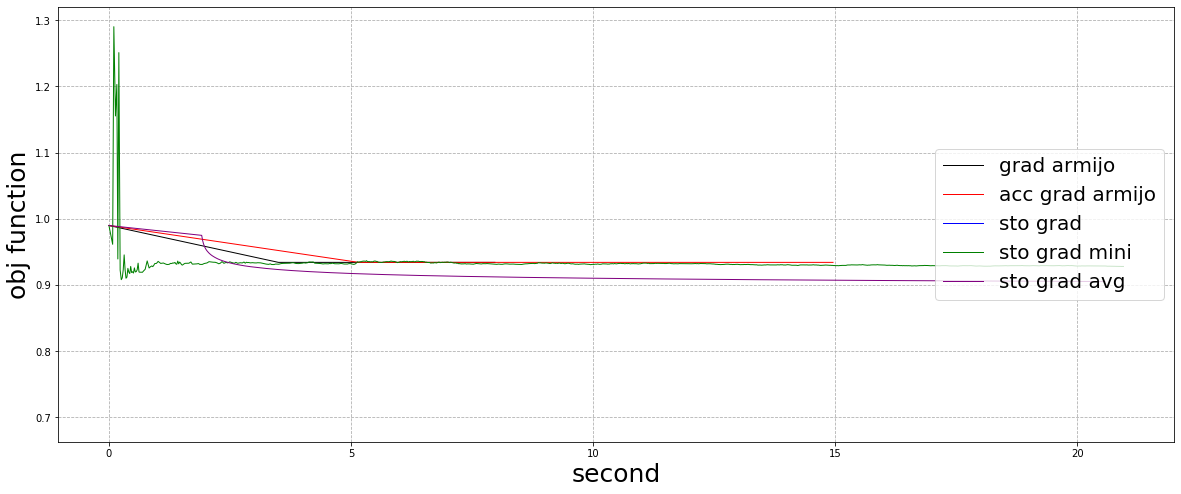

In [42]:
fig = plt.figure(figsize=(20, 8))
plt.plot(running_time_method6_hing,fx_array_method6_hing, label=("grad armijo"), linewidth=1.0, color ="black")
plt.plot(running_time_method7_hing,fx_array_method7_hing, label=("acc grad armijo"), linewidth=1.0, color ="red")
plt.plot(running_time_method2_hing,fx_array_method2_hing, label=("sto grad"), linewidth=1.0, color ="blue")
plt.plot(running_time_method3_hing,fx_array_method3_hing, label=("sto grad mini"), linewidth=1.0, color ="green")
plt.plot(running_time_method5_hing,fx_array_method5_hing, label=("sto grad avg"), linewidth=1.0, color ="purple")

plt.legend(prop={'size': 20},loc="right")
plt.xlabel("second", fontsize=25)
plt.ylabel("obj function", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()